# Compare to [mnist](http://geektutu.com/post/tensorflow2-mnist-cnn.html)

7.5s to 50s, 7x fast. good.

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras import datasets, layers, models

In [3]:
physical_devices = tf.config.list_physical_devices('GPU')
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

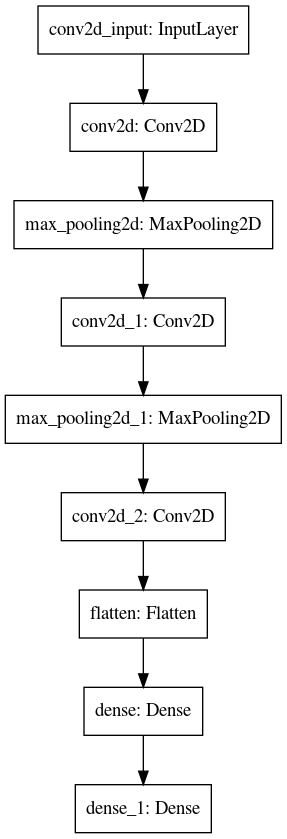

In [5]:
tf.keras.utils.plot_model(model)

In [6]:
mnist = datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
save_model = tf.keras.callbacks.ModelCheckpoint('./', save_weights_only=True, verbose=1, period=5)
model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, callbacks=[save_model])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1510 - accuracy: 0.9531
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0461 - accuracy: 0.9855
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9937
Epoch 00005: saving model to ./
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0202 - accuracy: 0.9937
